# Phân tích dữ liệu với Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Cách chọn phương pháp visualization phù hợp?

Khi tạo visualization cho các biến riêng lẻ, trước tiên, chúng ta cần phải hiểu mình đang xử lý kiểu biến nào. Điều này sẽ giúp chúng ta tìm ra phương pháp visualization phù hợp cho biến đó.

In [4]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


## Câu hỏi #1:
Kiểu dữ liệu của cột "peak-rpm" là gì?

**float64**

Ví dụ: chúng ta có thể tính toán tương quan giữa các biến kiểu "int64" hoặc "float64" bằng phương thức "corr":

In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Câu hỏi #2:
Tìm mối tương quan giữa các cột sau: bore (thông số đường kính), stroke (hành trình piston), compression-ratio (tỷ lệ nén) , và horsepower (mã lực).

Gợi ý: nếu bạn muốn chọn những cột đó, hãy sử dụng cú pháp sau: df[['bore','stroke' ,'compression-ratio','horsepower']]

In [6]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Biến số liên tục:

Các biến số liên tục là các biến có thể chứa bất kỳ giá trị nào trong một phạm vi. Các biến số liên tục có thể thuộc kiểu "int64" hoặc "float64". Một cách rất tốt để visualize các biến này là sử dụng biểu đồ phân tán với các đường phù hợp

Để bắt đầu hiểu mối quan hệ (tuyến tính) giữa một biến riêng lẻ và giá. Chúng ta có thể thực hiện điều này bằng cách sử dụng "regplot" để vẽ biểu đồ phân tán cộng với đường hồi quy phù hợp cho dữ liệu.

Hãy tìm biểu đồ phân tán của "engine-size" (kích thước động cơ) và "price" (giá)

(1.0, 47412.45)

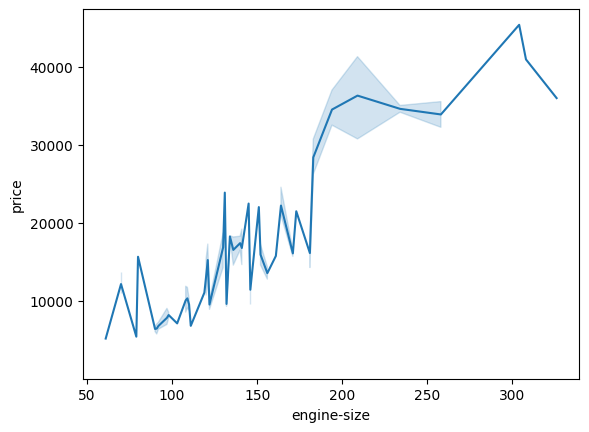

In [7]:
sns.lineplot(x = 'engine-size',y = 'price', data = df)
plt.ylim(1,)

Khi highway-mpg tăng lên, price sẽ giảm: điều này cho thấy mối quan hệ nghịch đảo / tiêu cực giữa hai biến này. Highway mpg có thể là một công cụ để dự đoán price.

In [8]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Mối quan hệ tuyến tính yếu

Hãy xem liệu "Peak-rpm" (số vòng/ phút tối đa) có phải là một biến dự đoán của "price" hay không nhé.

<Axes: xlabel='peak-rpm', ylabel='price'>

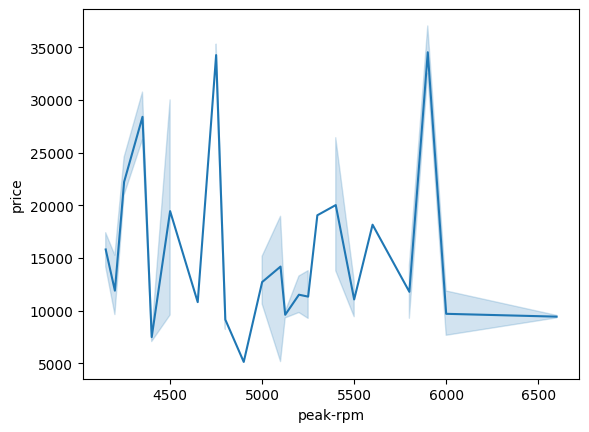

In [9]:
sns.lineplot(x = 'peak-rpm',y='price',data = df)

Có vẻ là Peak rpm không phải là một công cụ tốt để dự đoán giá vì đường hồi quy gần như là một đường nằm ngang. Ngoài ra, các điểm dữ liệu rất phân tán và xa đường phù hợp, cho thấy rằng các điểm dữ liệu rất khác nhau. Do đó, nó không phải là một biến đáng tin cậy.

Chúng ta có thể kiểm tra mối tương quan giữa 'peak-rpm' và 'price' và thấy rằng nó xấp xỉ -0.101616

In [10]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Câu hỏi 3 a):
Tìm mối tương quan giữa x = "stroke", y = "price".

Gợi ý: nếu bạn muốn chọn các cột đó, hãy sử dụng cú pháp sau: df[["stroke","price"]]

In [11]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## Câu hỏi 3 b):
Với kết quả tương quan giữa "price" và "stroke", bạn nghĩ giữa chúng có mối quan hệ tuyến tính không?

Xác minh kết quả của bạn với hàm "regplot()".

<Axes: xlabel='price', ylabel='stroke'>

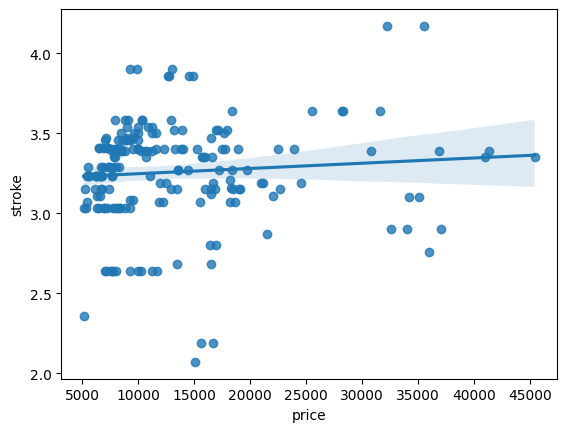

In [12]:
sns.regplot(x = 'price', y = 'stroke',data = df)

### Các biến phân loại
Đây là các biến mô tả 'characteristic' (đặc điểm) của đơn vị dữ liệu và chúng được chọn từ một nhóm nhỏ các danh mục. Các biến phân loại có thể có kiểu "object" hoặc "int64". Dùng biểu đồ hộp là một cách tốt để visualize các biến phân loại.

Hãy xem mối quan hệ giữa "body-style" (kiểu thân xe) và "price".

<Axes: xlabel='body-style', ylabel='price'>

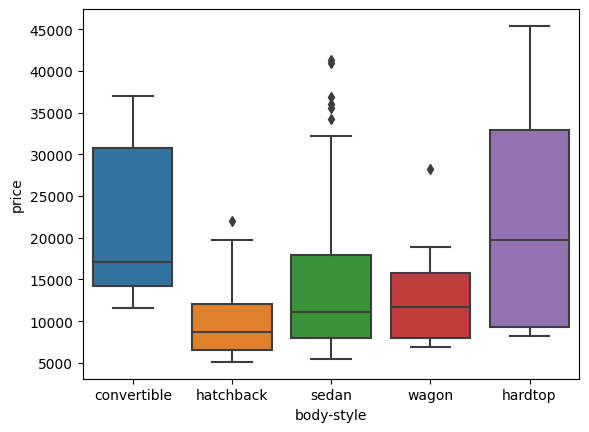

In [13]:
sns.boxplot(x= 'body-style', y ='price',data = df)

Chúng ta thấy rằng sự phân bổ của price giữa các danh mục body-style khác nhau có sự trùng lặp khá nhiều và do đó, body-style sẽ không phải là một công cụ tốt để dự đoán giá. Hãy xem xét "engine-location" và "price" của động cơ:

<Axes: xlabel='engine-location', ylabel='price'>

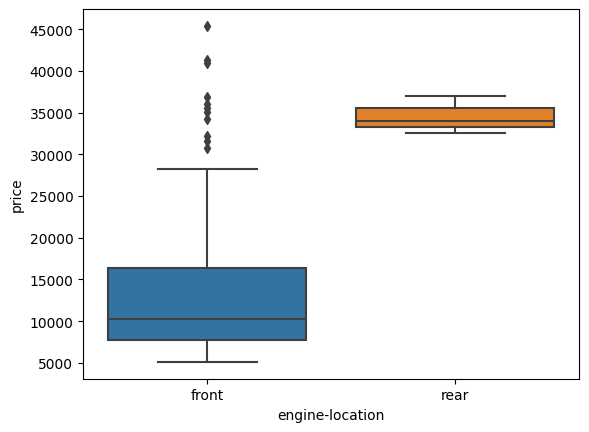

In [14]:
sns.boxplot(x = 'engine-location', y= 'price',data = df)

Ở đây, chúng ta thấy rằng sự phân bổ giá giữa hai danh mục engine-location, front (phía trước) và rear (phía sau) có sự khác biệt đủ lớn để chúng ta có thể coi engine-location là một công cụ tốt để dự đoán price.

Hãy xem xét "drive-wheels" (bánh xe dẫn động) và "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

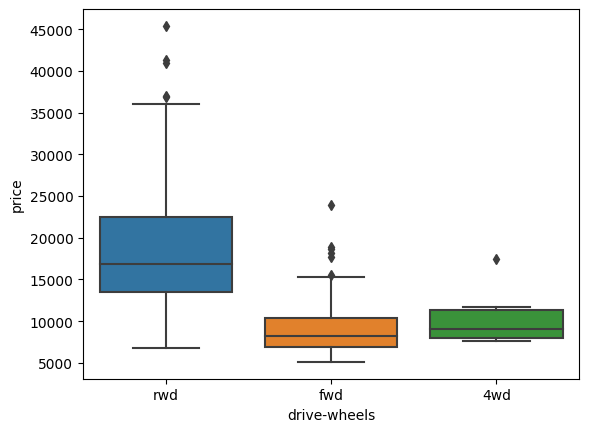

In [15]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df )

# 3. Phân tích thống kê mô tả

<p>Đầu tiên, hãy xem xét các biến bằng cách sử dụng phương pháp mô tả.</p>

 <p> Hàm <b>describe</b> tự động tính toán các thống kê cơ bản cho tất cả các biến liên tục. Mọi giá trị NaN sẽ tự động bị bỏ qua trong các thống kê này. </p>

Hàm này sẽ cho chúng ta thấy:

<ul>
    <li>số lượng biến đó</li>
    <li>giá trị trung bình</li>
    <li>độ lệch chuẩn (std)</li>
    <li>giá trị nhỏ nhất</li>
    <li>IQR (Phạm vi liên phần: 25%, 50% và 75%)</li>
    <li>giá trị lớn nhất</li>
<ul>


In [16]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [17]:
df.describe(include = ['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Số lượng biến

Value-counts là một cách hay để biết mỗi đặc điểm / biến thì có bao nhiêu đơn vị. Chúng ta có thể áp dụng phương thức "value_counts" trên cột "drive-wheel". Hãy nhớ rằng phương thức "value_counts" chỉ hoạt động trên chuỗi Pandas, chứ không hoạt động trên Khung dữ liệu Pandas. Do đó, chúng ta chỉ dùng 1 dấu ngoặc vuông "df ['drive-wheel']" chứ không phải 2 dấu ngoặc "df [['drive-wheel']]".

In [19]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Chúng ta có thể chuyển đổi chuỗi thành Khung dữ liệu như sau:

In [20]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [22]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns = {'drive-wheels':'value_counts'},inplace = True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [23]:
drive_wheels_counts.index.name = 'drive_wheels'

In [25]:
drive_wheels_counts

,value_counts
drive_wheels,
fwd,118
rwd,75
4wd,8


In [32]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns = {'engine-location':'value-counts'},inplace = True)
engine_loc_counts.index.name = 'engine-location'

In [33]:
engine_loc_counts

,value-counts
engine-location,
front,198
rear,3


## 4. Những điều cơ bản của việc nhóm dữ liệu

Phương thức "groupby" nhóm dữ liệu theo các danh mục khác nhau. Dữ liệu được nhóm dựa trên một hoặc một số biến và chúng ta sẽ thực hiện phân tích trên các nhóm riêng lẻ.

Ví dụ: hãy dùng groupby với biến "drive-wheels". Chúng ta thấy rằng có 3 loại drive wheels khác nhau.

In [36]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

húng ta có thể chọn các cột 'drive-wheels', 'body-style' và 'price', sau đó gán nó cho biến "df_group_one".

In [40]:
df_group_one = df[['drive-wheels','body-style','price']]

Sau đó, chúng ta có thể tính giá trung bình cho từng loại dữ liệu khác nhau.

In [42]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index = False).mean()

<ipython-input-42-d81b1137ca2e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index = False).mean()


In [43]:
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Từ dữ liệu của chúng ta, có vẻ như, xét trung bình thì xe rear-wheel drive (dẫn động cầu sau) là loại đắt nhất, trong khi xe 4-wheel (4 bánh) và front-wheel (bánh trước) có giá tương đương nhau.

Bạn cũng có thể nhóm với nhiều biến. Ví dụ: hãy nhóm theo cả 'drive-wheels' và 'body-style'. Tức là chúng ta nhóm khung dữ liệu theo các kết hợp duy nhất giữa 'drive-wheels' và 'body-style'. Chúng ta có thể lưu trữ kết quả trong biến 'grouped_test1'.

In [49]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [50]:
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Khi dữ liệu được nhóm này được chuyển thành một bảng tổng hợp (pivot table) thì sẽ dễ visualize hơn nhiều. Bảng tổng hợp giống như một bảng tính Excel, với một biến dọc theo cột và một biến khác dọc theo hàng. Chúng ta có thể chuyển đổi khung dữ liệu thành bảng tổng hợp bằng phương thức "pivot" để tạo bảng tổng hợp từ các nhóm.

Trong trường hợp này, chúng ta sẽ để biến drive-wheel làm các hàng của bảng và xoay body-style thành các cột của bảng:

In [51]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Thông thường, chúng ta sẽ không có dữ liệu cho một số ô xoay (pivot cell). Chúng ta có thể điền 0 vào các ô bị thiếu này, nhưng chúng ta có thể dùng bất kỳ giá trị nào khác cũng được. Các bạn cần lưu ý rằng việc thiếu dữ liệu là một chủ đề khá phức tạp và có cả một khóa học về chủ đề này.

In [53]:
grouped_pivot = grouped_pivot.fillna(0)

In [54]:
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Câu hỏi 4:

Sử dụng hàm "groupby" để tìm "price" trung bình của mỗi chiếc xe dựa trên "body-style"?

In [55]:
df_body_price = df[['price','body-style']]

In [57]:
df_body_price = df_body_price.groupby(['body-style'], as_index= False).mean()

In [58]:
df_body_price

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


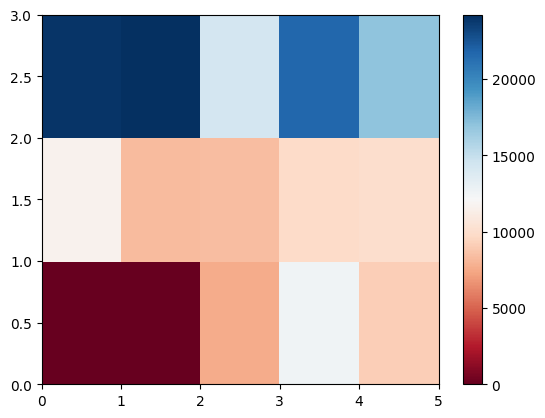

In [59]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

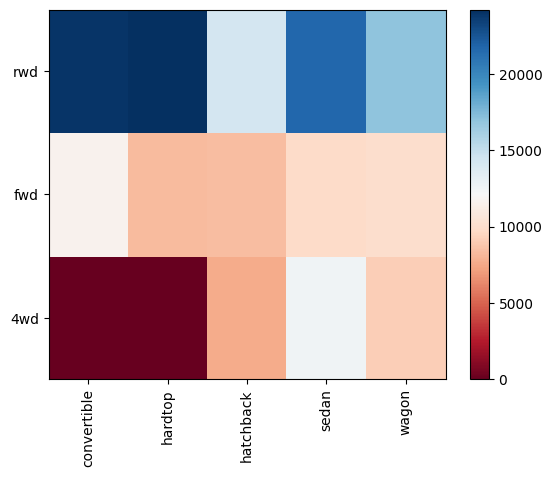

In [60]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 5. Mối tương quan và Nhân quả

Tương quan : thước đo mức độ các biến phụ thuộc lẫn nhau.

Nhân quả : mối quan hệ giữa nguyên nhân và kết quả giữa hai biến.

Điều quan trọng là phải biết sự khác biệt giữa tương quan và nhân quả này cũng như tương quan không bao hàm nhân quả. Việc xác định mối tương quan đơn giản hơn nhiều so với việc xác định nhân quả vì có thể cần thử nghiệm độc lập để xác định nhân quả.

Tương quan Pearson

Tương quan Pearson Correlation đo sự phụ thuộc tuyến tính giữa hai biến X và Y.

Hệ số kết quả là một giá trị từ -1 đến 1 (bao gồm cả -1 và 1), trong đó:

1: Tổng tương quan tuyến tính dương.

0: Không có tương quan tuyến tính, có khả năng cao là 2 biến không ảnh hưởng tới nhau.

-1: Tổng tương quan tuyến tính âm.

In [61]:
df.corr()

<ipython-input-61-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<b>Giá trị P (P-value)</b>:

<p> Giá trị P là gì? Giá trị P là giá trị xác suất mà khi đó, mối tương quan giữa hai biến này có ý nghĩa thống kê. Thông thường, chúng ta chọn mức ý nghĩa là 0,05, có nghĩa là chúng ta tin 95% rằng mối tương quan giữa các biến là có ý nghĩa. </p>

Theo quy ước, khi

<ul>
    <li> giá trị p là $ <0,001 $: chúng ta cho rằng có bằng chứng với độ thuyết phục cao rằng mối tương quan là có ý nghĩa. </li>
    <li> giá trị p là $ <0,05 đô la: có bằng chứng với độ thuyết phục vừa phải cho thấy mối tương quan là có ý nghĩa. </li>
    <li> giá trị p là $ <0,1 $: có bằng chứng vối độ thuyết phục thấp cho thấy mối tương quan là có ý nghĩa. </li>
    
    <li> giá trị p là $> $ 0,1: không có bằng chứng cho thấy mối tương quan là có ý nghĩa. </li>
</ul>

In [62]:
from scipy import stats

### Wheel-base (chiều dài cơ sở của xe) với Price

Hãy tính Hệ số tương quan Pearson và giá trị P của 'wheel-base' và 'price'.

In [63]:
peason_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])

In [64]:
peason_coef, p_value

(0.584641822265508, 8.076488270732885e-20)

Vì giá trị p  <  0.001, nên mối tương quan giữa wheel-base và price có ý nghĩa thống kê, mặc dù mối quan hệ tuyến tính không quá mạnh (~ 0,585)

### Horsepower so với Price

Hãy tính Hệ số tương quan Pearson và giá trị P của 'horsepower' và 'price'.

In [67]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])

In [68]:
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428259557e-48


Vì giá trị P  <  0.001, mối tương quan giữa horsepower và price có ý nghĩa thống kê, và mối quan hệ tuyến tính khá mạnh (~0.809, gần bằng 1)

### Length (chiều dài) so với Price

Hãy tính Hệ số tương quan Pearson và giá trị P của 'length' và 'price'.

In [69]:
pearson_coef, p_value = stats.pearsonr(df['length'],df['price'])

In [70]:
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159723e-30


Vì giá trị P  <  0.001, mối tương quan giữa length và price có ý nghĩa thống kê, và mối quan hệ tuyến tính mạnh vừa phải (~0.691).

### Width (chiều rộng) so với Price

Hãy tính Hệ số tương quan Pearson và giá trị P của 'width' và 'price':

In [72]:
pearson_coef, p_value = stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P =  9.20033551048206e-38


### Curb-weight (trọng lượng xe) so với Price

Hãy tính Hệ số tương quan Pearson và giá trị P của 'curb-weight' và 'price':

In [73]:
pearson_coef, p_value = stats.pearsonr(df['price'],df['curb-weight'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


### Engine-size (Kích cỡ động cơ) so với Price

Hãy tính Hệ số tương quan Pearson và giá trị P của 'engine-size' và 'price':

In [74]:
pearson_coef, p_value = stats.pearsonr(df['price'],df['engine-size'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P =  9.265491622198793e-64


### Bore so với Price

Hãy tính Hệ số tương quan Pearson và giá trị P của 'bore' và 'price':

In [75]:
pearson_coef, p_value = stats.pearsonr(df['price'],df['bore'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =  8.049189483935315e-17


City-mpg (số dặm đi được/ galon trong thành phố) so với Price

In [76]:
pearson_coef, p_value = stats.pearsonr(df['price'],df['city-mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


## 6. ANOVA

<h3>ANOVA: Phân tích phương sai</h3>
<p>Phân tích phương sai  (ANOVA) là một phương pháp thống kê được sử dụng để kiểm tra xem liệu giữa các phương tiện của hai hoặc nhiều nhóm có sự khác biệt đáng kể hay không. ANOVA trả về hai tham số:</p>

<p><b>Điểm F-test</b>: ANOVA gỉa định rằngphương tiện của tất cả các nhóm đều giống nhau, tính toán phương tiện thực tế có độ sai lệch bao nhiêu so với giả định và báo cáo nó dưới dạng điểm F-test. Điểm số càng lớn có nghĩa là có sự khác biệt càng lớn giữa các phương tiện.</p>

<p><b>Giá trị P</b>:  Giá trị P thể hiện giá trị điểm được tính toán có ý nghĩa thống kê như thế nào.</p>

<p>Nếu biến price có tương quan chặt chẽ với biến mà chúng ta đang phân tích, chúng ta có thể mong đợi ANOVA trả về điểm F-test khá lớn và giá trị p nhỏ.</p>

<h3>Drive Wheels</h3>


<p> Vì ANOVA phân tích sự khác biệt giữa các nhóm khác nhau của cùng một biến, chúng ta nên dùng hàm groupby. Vì thuật toán ANOVA tự động tính trung bình dữ liệu, nên chúng ta không cần lấy giá trị trung bình trước. </p>

<p> Hãy xem liệu các loại 'drive-wheels' khác nhau có ảnh hưởng đến 'price' hay không, chúng ta nhóm dữ liệu. </p>

In [79]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


Chúng ta có thể lấy các giá trị của phương thức group bằng phương thức "get_group".

In [81]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [82]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Tách riêng: fwd (dẫn động 4 bánh bán thời gian) và rwd (dẫn động cầu sau)

In [83]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23
